<a href="https://colab.research.google.com/github/yahyalito/IP_Week3_core_Ibrahim_Yahya/blob/master/IP_Week3_core_Ibrahim_Yahya.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Independent Project

In [0]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

%matplotlib inline
from sklearn.linear_model import LinearRegression
from sklearn import model_selection
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
import statsmodels.api as sm
from statsmodels.graphics.gofplots import qqplot
from scipy.stats import shapiro 
import math
from scipy.stats import mannwhitneyu



## 1. Defining the Question

### a) Specifying the Data Analytic Question

In [0]:
#Compare two samples and check if they have the same distribution

### b) Defining the Metric for Success

In [0]:
#Either to reject or fail to reject the null hypothesis

## 2. Reading the Data

In [3]:
# Loading the Data from the source i.e. csv
# ---
autolib = pd.read_csv("http://bit.ly/DSCoreAutolibDataset")
autolib.head()


,Postal code,date,n_daily_data_points,dayOfWeek,day_type,BlueCars_taken_sum,BlueCars_returned_sum,Utilib_taken_sum,Utilib_returned_sum,Utilib_14_taken_sum,Utilib_14_returned_sum,Slots_freed_sum,Slots_taken_sum
0,75001,1/1/2018,1440,0,weekday,110,103,3,2,10,9,22,20
1,75001,1/2/2018,1438,1,weekday,98,94,1,1,8,8,23,22
2,75001,1/3/2018,1439,2,weekday,138,139,0,0,2,2,27,27
3,75001,1/4/2018,1320,3,weekday,104,104,2,2,9,8,25,21
4,75001,1/5/2018,1440,4,weekday,114,117,3,3,6,6,18,20


In [4]:
#Rename column 
autolib.rename(columns = {"Postal code" : "Postal_code"} , inplace = True)
autolib.head(1)

,Postal_code,date,n_daily_data_points,dayOfWeek,day_type,BlueCars_taken_sum,BlueCars_returned_sum,Utilib_taken_sum,Utilib_returned_sum,Utilib_14_taken_sum,Utilib_14_returned_sum,Slots_freed_sum,Slots_taken_sum
0,75001,1/1/2018,1440,0,weekday,110,103,3,2,10,9,22,20


In [5]:
autolib_blue = autolib.iloc[ :,:7]
autolib_blue.head()

,Postal_code,date,n_daily_data_points,dayOfWeek,day_type,BlueCars_taken_sum,BlueCars_returned_sum
0,75001,1/1/2018,1440,0,weekday,110,103
1,75001,1/2/2018,1438,1,weekday,98,94
2,75001,1/3/2018,1439,2,weekday,138,139
3,75001,1/4/2018,1320,3,weekday,104,104
4,75001,1/5/2018,1440,4,weekday,114,117


## 3. Checking the Data

In [6]:
# Determining the no. of records in our dataset
#
autolib.shape

(16085, 13)

In [7]:
# Previewing the top of our dataset
#
autolib.head()

,Postal_code,date,n_daily_data_points,dayOfWeek,day_type,BlueCars_taken_sum,BlueCars_returned_sum,Utilib_taken_sum,Utilib_returned_sum,Utilib_14_taken_sum,Utilib_14_returned_sum,Slots_freed_sum,Slots_taken_sum
0,75001,1/1/2018,1440,0,weekday,110,103,3,2,10,9,22,20
1,75001,1/2/2018,1438,1,weekday,98,94,1,1,8,8,23,22
2,75001,1/3/2018,1439,2,weekday,138,139,0,0,2,2,27,27
3,75001,1/4/2018,1320,3,weekday,104,104,2,2,9,8,25,21
4,75001,1/5/2018,1440,4,weekday,114,117,3,3,6,6,18,20


In [8]:
# Previewing the bottom of our dataset
# 
autolib.tail()

,Postal_code,date,n_daily_data_points,dayOfWeek,day_type,BlueCars_taken_sum,BlueCars_returned_sum,Utilib_taken_sum,Utilib_returned_sum,Utilib_14_taken_sum,Utilib_14_returned_sum,Slots_freed_sum,Slots_taken_sum
16080,95880,6/15/2018,1440,4,weekday,15,10,0,0,2,3,0,0
16081,95880,6/16/2018,1440,5,weekend,19,19,0,0,2,1,0,0
16082,95880,6/17/2018,1440,6,weekend,33,35,1,1,0,0,0,0
16083,95880,6/18/2018,1440,0,weekday,11,14,3,5,2,2,0,0
16084,95880,6/19/2018,1370,1,weekday,2,2,2,1,0,0,0,0


In [9]:
# Checking whether each column has an appropriate datatype
#
autolib.dtypes

Postal_code                int64
date                      object
n_daily_data_points        int64
dayOfWeek                  int64
day_type                  object
BlueCars_taken_sum         int64
BlueCars_returned_sum      int64
Utilib_taken_sum           int64
Utilib_returned_sum        int64
Utilib_14_taken_sum        int64
Utilib_14_returned_sum     int64
Slots_freed_sum            int64
Slots_taken_sum            int64
dtype: object

## 4. Tidying the Dataset

In [0]:
# Checking for Outliers
#


In [0]:
# Checking for Anomalies
#

In [11]:
# Identifying the Missing Data
#
autolib.isna().sum()

Postal_code               0
date                      0
n_daily_data_points       0
dayOfWeek                 0
day_type                  0
BlueCars_taken_sum        0
BlueCars_returned_sum     0
Utilib_taken_sum          0
Utilib_returned_sum       0
Utilib_14_taken_sum       0
Utilib_14_returned_sum    0
Slots_freed_sum           0
Slots_taken_sum           0
dtype: int64

## 5. Exploratory Analysis

####Univariate Analysis

In [14]:
#Each postal code has 156 entries 
#example displays first 5 postal code entries
autolib.Postal_code.value_counts().head()

94130    156
92310    156
78140    156
94700    156
95100    156
Name: Postal_code, dtype: int64

In [15]:
#Unique entries for the number of data points column

autolib.n_daily_data_points.unique()

array([1440, 1438, 1439, 1320, 1437, 1434, 1398, 1420, 1425, 1396, 1429,
       1389, 1380, 1364, 1318, 1377, 1203, 1417, 1435, 1174, 1436, 1411,
       1370])

(array([  104.,   103.,     0.,     0.,     0.,     0.,     0.,     0.,
          206.,     0.,   103.,   299.,   305.,   413., 14552.]),
 array([1174.        , 1191.73333333, 1209.46666667, 1227.2       ,
        1244.93333333, 1262.66666667, 1280.4       , 1298.13333333,
        1315.86666667, 1333.6       , 1351.33333333, 1369.06666667,
        1386.8       , 1404.53333333, 1422.26666667, 1440.        ]),
 <a list of 15 Patch objects>)

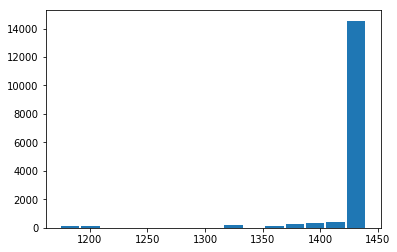

In [16]:
#Number of daily data points is mostly between 1350 and 1450 

plt.hist(autolib["n_daily_data_points"], bins=15, histtype='bar', rwidth=0.9)


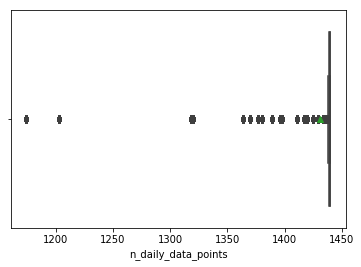

In [17]:
#Number of daily data points is mostly between 1350 and 1450 

sns.boxplot(autolib["n_daily_data_points"], showmeans=True)


(array([1.0842e+04, 2.0070e+03, 7.0200e+02, 6.8100e+02, 6.4400e+02,
        4.4100e+02, 1.8700e+02, 2.0300e+02, 1.7400e+02, 9.6000e+01,
        5.6000e+01, 2.5000e+01, 1.6000e+01, 5.0000e+00, 6.0000e+00]),
 array([   0.        ,   90.13333333,  180.26666667,  270.4       ,
         360.53333333,  450.66666667,  540.8       ,  630.93333333,
         721.06666667,  811.2       ,  901.33333333,  991.46666667,
        1081.6       , 1171.73333333, 1261.86666667, 1352.        ]),
 <a list of 15 Patch objects>)

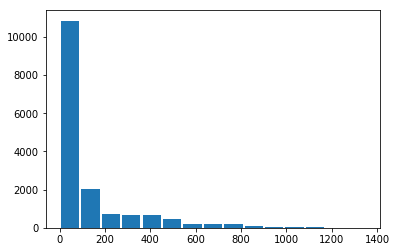

In [18]:
plt.hist(autolib["BlueCars_taken_sum"], bins=15, histtype='bar', rwidth=0.9)


(array([1.0762e+04, 2.0480e+03, 7.1100e+02, 6.6800e+02, 6.5100e+02,
        4.4400e+02, 1.9900e+02, 2.0800e+02, 1.6800e+02, 1.0400e+02,
        5.6000e+01, 3.6000e+01, 1.8000e+01, 6.0000e+00, 6.0000e+00]),
 array([   0. ,   88.8,  177.6,  266.4,  355.2,  444. ,  532.8,  621.6,
         710.4,  799.2,  888. ,  976.8, 1065.6, 1154.4, 1243.2, 1332. ]),
 <a list of 15 Patch objects>)

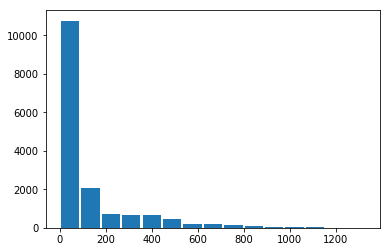

In [19]:
plt.hist(autolib["BlueCars_returned_sum"], bins=15, histtype='bar', rwidth=0.9)


(array([1.0842e+04, 2.0070e+03, 7.0200e+02, 6.8100e+02, 6.4400e+02,
        4.4100e+02, 1.8700e+02, 2.0300e+02, 1.7400e+02, 9.6000e+01,
        5.6000e+01, 2.5000e+01, 1.6000e+01, 5.0000e+00, 6.0000e+00]),
 array([   0.        ,   90.13333333,  180.26666667,  270.4       ,
         360.53333333,  450.66666667,  540.8       ,  630.93333333,
         721.06666667,  811.2       ,  901.33333333,  991.46666667,
        1081.6       , 1171.73333333, 1261.86666667, 1352.        ]),
 <a list of 15 Patch objects>)

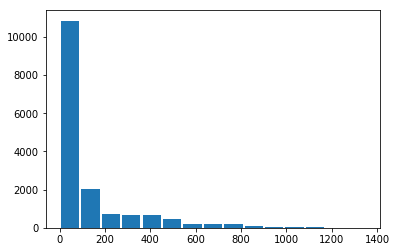

In [20]:
plt.hist(autolib["BlueCars_taken_sum"], bins=15, histtype='bar', rwidth=0.9)


(array([1.1338e+04, 2.2230e+03, 9.5600e+02, 6.4000e+02, 3.8800e+02,
        2.4900e+02, 1.5300e+02, 5.9000e+01, 4.2000e+01, 2.1000e+01,
        9.0000e+00, 4.0000e+00, 2.0000e+00, 0.0000e+00, 1.0000e+00]),
 array([ 0.        ,  3.86666667,  7.73333333, 11.6       , 15.46666667,
        19.33333333, 23.2       , 27.06666667, 30.93333333, 34.8       ,
        38.66666667, 42.53333333, 46.4       , 50.26666667, 54.13333333,
        58.        ]),
 <a list of 15 Patch objects>)

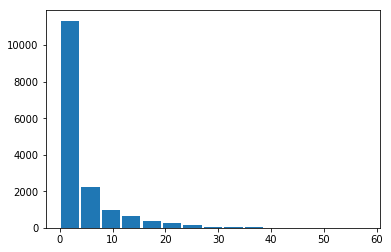

In [21]:
plt.hist(autolib["Utilib_returned_sum"], bins=15, histtype='bar', rwidth=0.9)


In [22]:
#Measures of Central tendency for no of daily data points

autolib['n_daily_data_points'].mode()

0    1440
dtype: int64

In [23]:
autolib['n_daily_data_points'].median()

1440.0

In [24]:
autolib['n_daily_data_points'].mean()

1431.3306185887473

In [25]:
#Measures of Central tendency for Blue cars taken sum


autolib['BlueCars_taken_sum'].mean()

125.92695057506994

In [26]:
autolib['BlueCars_taken_sum'].mode()

0    12
dtype: int64

In [27]:
autolib['BlueCars_taken_sum'].median()

46.0

In [28]:
autolib['BlueCars_taken_sum'].quantile([0.25,0.5,0.75])

0.25     20.0
0.50     46.0
0.75    135.0
Name: BlueCars_taken_sum, dtype: float64

In [29]:
autolib['BlueCars_taken_sum'].std()

185.42657876727893

In [30]:
autolib['BlueCars_taken_sum'].var()

34383.01611333789

In [31]:
#day of the week with the corresponding number of daily data points and a tally of 
# the entries for unique data points

autolib44 = autolib.groupby('dayOfWeek')['n_daily_data_points'].value_counts()
autolib44.head()

dayOfWeek  n_daily_data_points
0          1440                   1756
           1439                    206
           1417                    103
           1420                    103
           1437                    103
Name: n_daily_data_points, dtype: int64

In [32]:
isinstance(autolib44, pd.DataFrame)

False

In [33]:
autolib99 =autolib[(autolib['n_daily_data_points']  == 1440)]
autolib99.head()

,Postal_code,date,n_daily_data_points,dayOfWeek,day_type,BlueCars_taken_sum,BlueCars_returned_sum,Utilib_taken_sum,Utilib_returned_sum,Utilib_14_taken_sum,Utilib_14_returned_sum,Slots_freed_sum,Slots_taken_sum
0,75001,1/1/2018,1440,0,weekday,110,103,3,2,10,9,22,20
4,75001,1/5/2018,1440,4,weekday,114,117,3,3,6,6,18,20
6,75001,1/7/2018,1440,6,weekend,180,180,2,2,10,9,34,34
9,75001,1/10/2018,1440,2,weekday,88,85,5,5,11,11,23,22
10,75001,1/11/2018,1440,3,weekday,125,125,3,4,13,13,22,22


##### Answering Univariate Questions

In [34]:
#Which day of the week had the highest no of daily data points

(autolib99.groupby('dayOfWeek')['n_daily_data_points'].sum().sort_values(ascending = False)).head(1)


dayOfWeek
6    2679840
Name: n_daily_data_points, dtype: int64

In [35]:
#Which day of the week had the highest no of Blue cars taken
(autolib99.groupby('dayOfWeek')['BlueCars_taken_sum'].sum().sort_values(ascending = False)).head(3)


dayOfWeek
5    282704
6    270987
0    197779
Name: BlueCars_taken_sum, dtype: int64

In [36]:
#Which day of the week had the highest no of Blue cars returned
(autolib99.groupby('dayOfWeek')['BlueCars_returned_sum'].sum().sort_values(ascending = False)).head(3)


dayOfWeek
5    281018
6    276444
0    198530
Name: BlueCars_returned_sum, dtype: int64

In [37]:
#Which Postal code had the highest no of Blue cars taken
(autolib99.groupby('Postal_code')['BlueCars_taken_sum'].sum().sort_values(ascending = False)).head(3)


Postal_code
75015    91181
75016    79992
75017    74261
Name: BlueCars_taken_sum, dtype: int64

In [38]:
#Which Postal code had the highest no of Blue cars returned
(autolib99.groupby('Postal_code')['BlueCars_returned_sum'].sum().sort_values(ascending = False)).head(1)



Postal_code
75015    91652
Name: BlueCars_returned_sum, dtype: int64

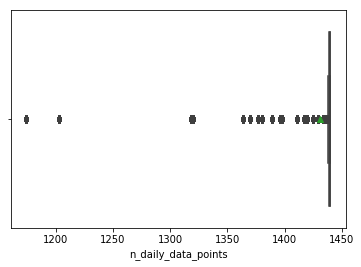

In [39]:
sns.boxplot(autolib["n_daily_data_points"], showmeans=True)


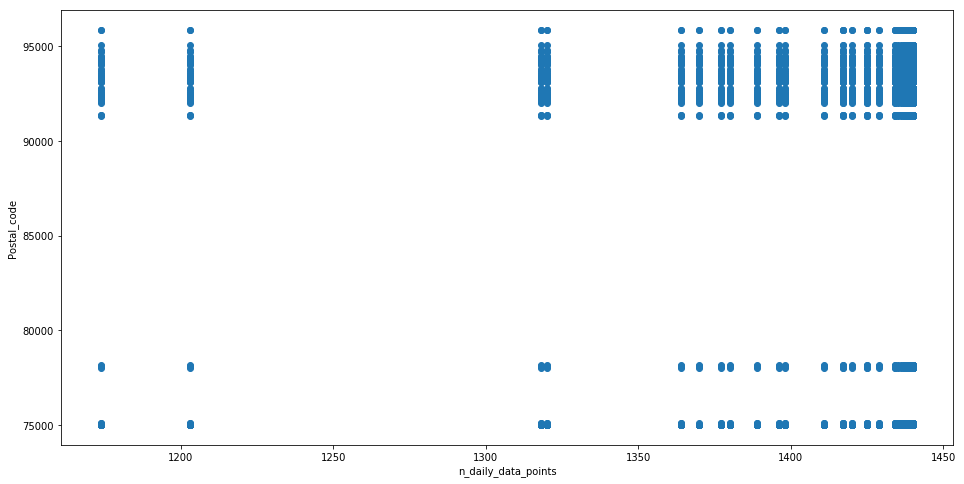

In [40]:
autolib2 = autolib.head(100)

fig, ax = plt.subplots(figsize=(16,8))

ax.scatter(autolib["n_daily_data_points"] ,autolib["Postal_code"])

ax.set_xlabel("n_daily_data_points")

ax.set_ylabel("Postal_code")

plt.show()

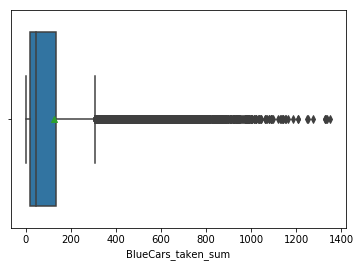

In [41]:
sns.boxplot(autolib["BlueCars_taken_sum"], showmeans=True)


In [42]:
autolib.groupby('Postal_code')["day_type"].value_counts()

Postal_code  day_type
75001        weekday     112
             weekend      44
75002        weekday     112
             weekend      44
75003        weekday     112
             weekend      44
75004        weekday     112
             weekend      44
75005        weekday     112
             weekend      44
75006        weekday     112
             weekend      44
75007        weekday     112
             weekend      44
75008        weekday     112
             weekend      44
75009        weekday     112
             weekend      44
75010        weekday     112
             weekend      44
75011        weekday     112
             weekend      44
75012        weekday     112
             weekend      44
75013        weekday     112
             weekend      44
75014        weekday     112
             weekend      44
75015        weekday     112
             weekend      44
                        ... 
94140        weekday     112
             weekend      44
94150        weekday 

###Bivariate Analysis

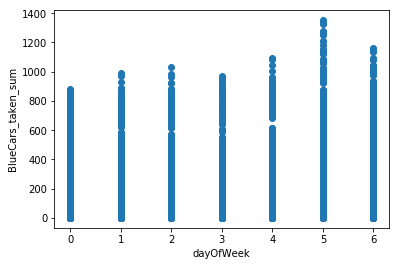

In [43]:
# scatter plot of blue cars against day of the week


plt.scatter(autolib['dayOfWeek'], autolib['BlueCars_taken_sum'])
plt.title('')

plt.xlabel('dayOfWeek')

plt.ylabel('BlueCars_taken_sum')

plt.show()

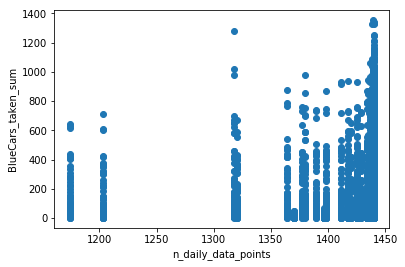

In [44]:
plt.scatter(autolib['n_daily_data_points'], autolib['BlueCars_taken_sum'])
plt.title('')

plt.xlabel('n_daily_data_points')

plt.ylabel('BlueCars_taken_sum')

plt.show()

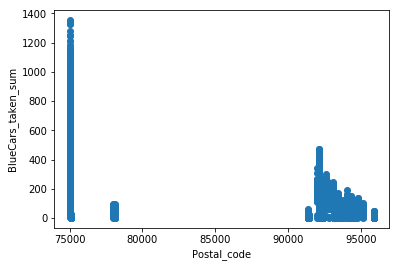

In [45]:
plt.scatter(autolib['Postal_code'], autolib['BlueCars_taken_sum'])
plt.title('')

plt.xlabel('Postal_code')

plt.ylabel('BlueCars_taken_sum')

plt.show()

<Figure size 216x216 with 0 Axes>

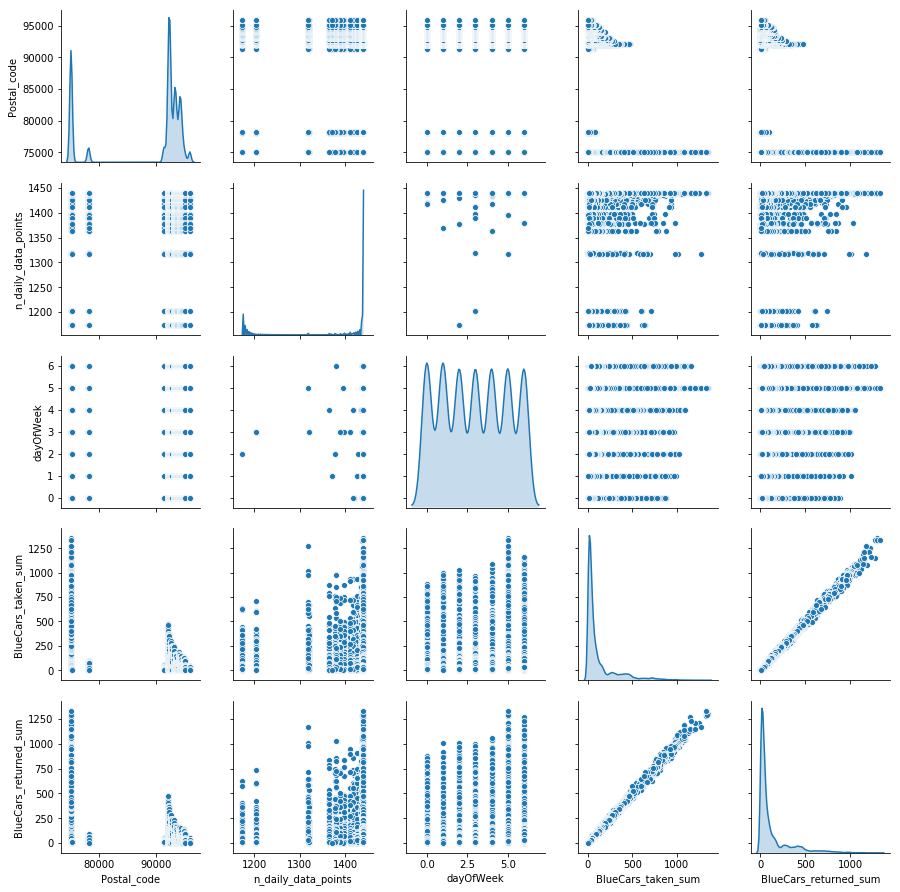

In [46]:
plt.figure(figsize=(3, 3))
sns.pairplot(autolib_blue, diag_kind='kde');

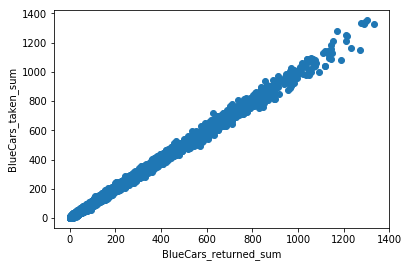

In [47]:
# Scatter of blue cars taken vs blue cars returned

plt.scatter(autolib['BlueCars_returned_sum'], autolib['BlueCars_taken_sum'])
plt.title('')

plt.xlabel('BlueCars_returned_sum')

plt.ylabel('BlueCars_taken_sum')

plt.show()

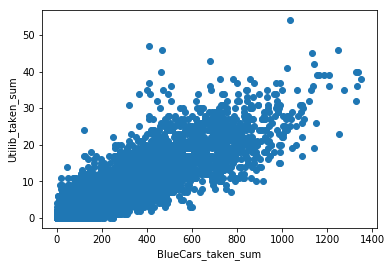

In [48]:
# Scatter of blue cars taken vs Utilib taken


plt.scatter(autolib['BlueCars_taken_sum'], autolib['Utilib_taken_sum'])
plt.title('')

plt.xlabel('BlueCars_taken_sum')

plt.ylabel('Utilib_taken_sum')

plt.show()

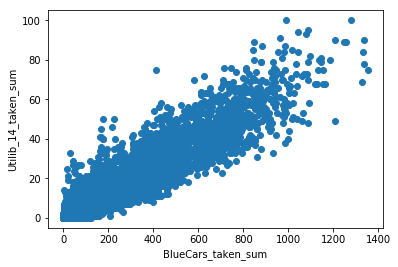

In [49]:
# Scatter of blue cars taken vs Utilib14 taken


plt.scatter(autolib['BlueCars_taken_sum'], autolib['Utilib_14_taken_sum'])
plt.title('')

plt.xlabel('BlueCars_taken_sum')

plt.ylabel('Utilib_14_taken_sum')

plt.show()

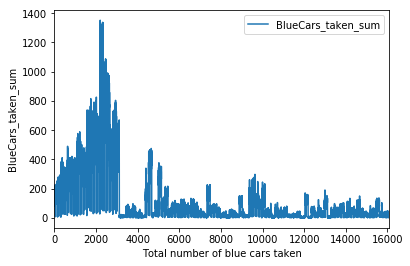

In [50]:
# Plotting our line graph
autolib[["BlueCars_taken_sum"]].plot()

# Giving a title to our line graph
plt.title("", fontsize=14, y=1.015)

# Labelling the y-axis
plt.ylabel('BlueCars_taken_sum')
# Labelling the x-axis
plt.xlabel('Total number of blue cars taken')

# Displaying our graph
plt.show()

###Multivariate Analysis

In [51]:
autolib_copy = autolib.copy()
autolib_copy.head()

,Postal_code,date,n_daily_data_points,dayOfWeek,day_type,BlueCars_taken_sum,BlueCars_returned_sum,Utilib_taken_sum,Utilib_returned_sum,Utilib_14_taken_sum,Utilib_14_returned_sum,Slots_freed_sum,Slots_taken_sum
0,75001,1/1/2018,1440,0,weekday,110,103,3,2,10,9,22,20
1,75001,1/2/2018,1438,1,weekday,98,94,1,1,8,8,23,22
2,75001,1/3/2018,1439,2,weekday,138,139,0,0,2,2,27,27
3,75001,1/4/2018,1320,3,weekday,104,104,2,2,9,8,25,21
4,75001,1/5/2018,1440,4,weekday,114,117,3,3,6,6,18,20


In [0]:
autolib_copy["day_type"] = autolib_copy["day_type"].map({"weekday" : 0 , "weekend" :1})

In [53]:
autolib_copy.tail()

,Postal_code,date,n_daily_data_points,dayOfWeek,day_type,BlueCars_taken_sum,BlueCars_returned_sum,Utilib_taken_sum,Utilib_returned_sum,Utilib_14_taken_sum,Utilib_14_returned_sum,Slots_freed_sum,Slots_taken_sum
16080,95880,6/15/2018,1440,4,0,15,10,0,0,2,3,0,0
16081,95880,6/16/2018,1440,5,1,19,19,0,0,2,1,0,0
16082,95880,6/17/2018,1440,6,1,33,35,1,1,0,0,0,0
16083,95880,6/18/2018,1440,0,0,11,14,3,5,2,2,0,0
16084,95880,6/19/2018,1370,1,0,2,2,2,1,0,0,0,0


In [54]:
autolib_copy2 = autolib.copy()
autolib_copy2.head()

,Postal_code,date,n_daily_data_points,dayOfWeek,day_type,BlueCars_taken_sum,BlueCars_returned_sum,Utilib_taken_sum,Utilib_returned_sum,Utilib_14_taken_sum,Utilib_14_returned_sum,Slots_freed_sum,Slots_taken_sum
0,75001,1/1/2018,1440,0,weekday,110,103,3,2,10,9,22,20
1,75001,1/2/2018,1438,1,weekday,98,94,1,1,8,8,23,22
2,75001,1/3/2018,1439,2,weekday,138,139,0,0,2,2,27,27
3,75001,1/4/2018,1320,3,weekday,104,104,2,2,9,8,25,21
4,75001,1/5/2018,1440,4,weekday,114,117,3,3,6,6,18,20


In [55]:
autolib_copy2 = autolib_copy2.drop("date" , axis =1)
autolib_copy2.head()

,Postal_code,n_daily_data_points,dayOfWeek,day_type,BlueCars_taken_sum,BlueCars_returned_sum,Utilib_taken_sum,Utilib_returned_sum,Utilib_14_taken_sum,Utilib_14_returned_sum,Slots_freed_sum,Slots_taken_sum
0,75001,1440,0,weekday,110,103,3,2,10,9,22,20
1,75001,1438,1,weekday,98,94,1,1,8,8,23,22
2,75001,1439,2,weekday,138,139,0,0,2,2,27,27
3,75001,1320,3,weekday,104,104,2,2,9,8,25,21
4,75001,1440,4,weekday,114,117,3,3,6,6,18,20


####Applying P.C.A

In [0]:
# step 1
#  Preprocessing
# The first preprocessing step is to divide the dataset into a feature set and corresponding labels. 
# The following script performs this task. The script below stores the feature sets into the X variable 
# and the series of corresponding labels in to the y variable.
# 
X = autolib_copy2.drop('day_type', 1)
y = autolib_copy2['day_type']

In [0]:
# step 2
#  Splitting the dataset into the Training set and Test set
# The next preprocessing step is to divide data into training and test sets. 
# We execute the following script to do so:
#
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [0]:
# step 3
#  Normalization
# As mentioned earlier, PCA performs best with a normalized feature set. 
# We will perform standard scalar normalization to normalize our feature set. 
# To do this, we execute the following code:
# 
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [0]:
## step 4
#  Applying PCA
from sklearn.decomposition import PCA

pca = PCA()
X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)

In [116]:
#step 5
#  Explained Variance Ratio
explained_variance = pca.explained_variance_ratio_
explained_variance


array([7.20082546e-01, 9.13194268e-02, 9.06988505e-02, 4.54748586e-02,
       2.83890579e-02, 1.52655613e-02, 6.23204413e-03, 1.62299507e-03,
       7.30273275e-04, 1.44551275e-04, 3.98354243e-05])

In [0]:
# Using 1 Principal Component
from sklearn.decomposition import PCA

pca = PCA(n_components=1)
X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)


In [102]:
# Training and Making Predictions
from sklearn.ensemble import RandomForestClassifier

classifier = RandomForestClassifier(max_depth=2, random_state=0)
classifier.fit(X_train, y_train)

# Predicting the Test set results
y_pred = classifier.predict(X_test)

/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


In [103]:
#  Performance Evaluation

##Using 1 component gives a 71.3% Accuracy
 
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

cm = confusion_matrix(y_test, y_pred)
print(cm)
print('Accuracy', accuracy_score(y_test, y_pred))

#we will compare this with the Discriminant analysis value

[[2237   76]
 [ 847   57]]
Accuracy 0.7130867267640659


In [0]:
# Using 2 Principal Component


#in order to check this, run step 1 to 5 then run the succesive cells for principal component =2

from sklearn.decomposition import PCA

pca = PCA(n_components=2)
X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)


In [110]:
# Training and Making Predictions
from sklearn.ensemble import RandomForestClassifier

classifier = RandomForestClassifier(max_depth=2, random_state=0)
classifier.fit(X_train, y_train)

# Predicting the Test set results
y_pred = classifier.predict(X_test)

/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


In [111]:
#Using 2 components gives a 97.73% Accuracy
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

cm = confusion_matrix(y_test, y_pred)
print(cm)
print('Accuracy', accuracy_score(y_test, y_pred))



[[2311    2]
 [  71  833]]
Accuracy 0.9773080509791732


In [0]:
# Using 3 Principal Component
from sklearn.decomposition import PCA

pca = PCA(n_components=3)
X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)

In [118]:
# Training and Making Predictions
from sklearn.ensemble import RandomForestClassifier

classifier = RandomForestClassifier(max_depth=2, random_state=0)
classifier.fit(X_train, y_train)

# Predicting the Test set results
y_pred = classifier.predict(X_test)

/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


In [119]:
#Using 3 components gives a 97.79% Accuracy
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

cm = confusion_matrix(y_test, y_pred)
print(cm)
print('Accuracy', accuracy_score(y_test, y_pred))

[[2313    0]
 [  71  833]]
Accuracy 0.9779297482126205




####Applying Discriminant Analysis

In [120]:
new_autolib = autolib_copy2.copy()
new_autolib.head()

,Postal_code,n_daily_data_points,dayOfWeek,day_type,BlueCars_taken_sum,BlueCars_returned_sum,Utilib_taken_sum,Utilib_returned_sum,Utilib_14_taken_sum,Utilib_14_returned_sum,Slots_freed_sum,Slots_taken_sum
0,75001,1440,0,weekday,110,103,3,2,10,9,22,20
1,75001,1438,1,weekday,98,94,1,1,8,8,23,22
2,75001,1439,2,weekday,138,139,0,0,2,2,27,27
3,75001,1320,3,weekday,104,104,2,2,9,8,25,21
4,75001,1440,4,weekday,114,117,3,3,6,6,18,20


In [0]:
#
X = new_autolib.loc[:, new_autolib.columns != 'day_type'].values
y = new_autolib.iloc[:, 3].values


In [0]:
# The following code divides data into training and test sets

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [0]:
# We now need to perform feature scaling. We execute the following code to do so:
# 
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [0]:
# The LinearDiscriminantAnalysis class of the sklearn.discriminant_analysis 
# library can be used to Perform LDA in Python. 
# Let's take a look at the following code
#

from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
lda = LDA(n_components=1)
X_train = lda.fit_transform(X_train, y_train)
X_test = lda.transform(X_test)

In [125]:
# Training and Making Predictions
# We will use the random forest classifier to evaluate the performance of a PCA-reduced algorithms as shown
# 

from sklearn.ensemble import RandomForestClassifier

classifier = RandomForestClassifier(max_depth=2, random_state=0)
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)

/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


In [126]:
# Evaluating the Performance
# As always, the last step is to evaluate performance of the algorithm 
# with the help of a confusion matrix and find the accuracy of the prediction.
# 

from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

cm = confusion_matrix(y_test, y_pred)
print(cm)
print('Accuracy' + str(accuracy_score(y_test, y_pred)))

# We can see that with one linear discriminant, the algorithm achieved an accuracy of 99.69%, 
#This is higher than the 71.3% achieved by 1 PCA component

[[2307    6]
 [   4  900]]
Accuracy0.9968915138327634


####Applying  Linear Regression


In [127]:
new_autolib2 = autolib_copy2.copy()
new_autolib2.head()

,Postal_code,n_daily_data_points,dayOfWeek,day_type,BlueCars_taken_sum,BlueCars_returned_sum,Utilib_taken_sum,Utilib_returned_sum,Utilib_14_taken_sum,Utilib_14_returned_sum,Slots_freed_sum,Slots_taken_sum
0,75001,1440,0,weekday,110,103,3,2,10,9,22,20
1,75001,1438,1,weekday,98,94,1,1,8,8,23,22
2,75001,1439,2,weekday,138,139,0,0,2,2,27,27
3,75001,1320,3,weekday,104,104,2,2,9,8,25,21
4,75001,1440,4,weekday,114,117,3,3,6,6,18,20


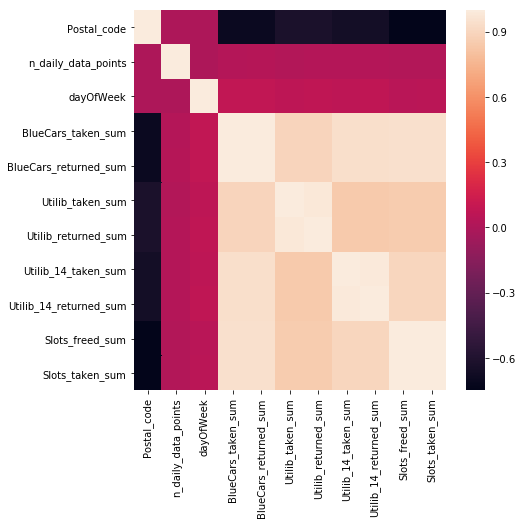

In [128]:
plt.figure(figsize=(7, 7))
sns.heatmap(new_autolib2.corr())

In [0]:
X = new_autolib2[["BlueCars_returned_sum" ,"Utilib_taken_sum" ,"Utilib_returned_sum" ,"Utilib_14_taken_sum" ,"Utilib_14_returned_sum", "Slots_freed_sum" ,"Slots_taken_sum"]]

y =new_autolib2[["BlueCars_taken_sum"]]

In [0]:
## Trained data is the data on which we apply the linear regression algorithm. 
# 40% of the data will go to the test data and the rest remains in the training set.
# And finally we test that algorithm on the test data. The code for splitting is as follows
# ---

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.4, random_state = 101)

In [0]:
# We then create and train the model by fitting the linear regression model on the training data.
# ---
lm = LinearRegression()
results = lm.fit(X_train,y_train)

In [0]:
# Grabbing predictions off the test set and see how well it did
# ---
predictions = lm.predict(X_test)

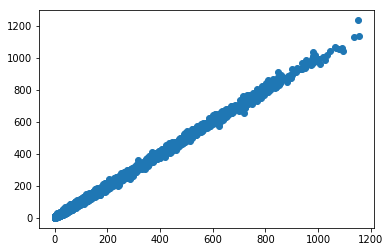

In [133]:
# Then visualising the prediction
# ---
plt.scatter(y_test,predictions)

### Normality Test

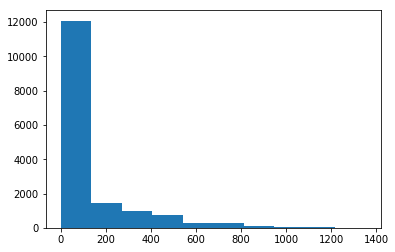

In [134]:
#Blue cars is not normally distributed

plt.hist(autolib["BlueCars_taken_sum"])
plt.show()

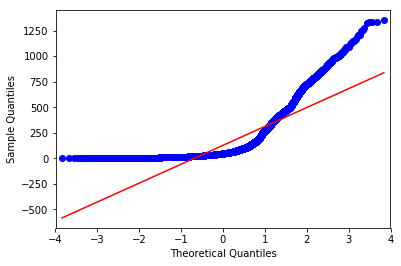

In [135]:
# data doesnot follow a normal distribution
qqplot(autolib["BlueCars_taken_sum"], line='s')
plt.show()

In [0]:
# testing for normality
stat, p = shapiro(autolib["BlueCars_taken_sum"])
print('Statistics=%.3f, p=%.3f' % (stat, p))

# interpreting
alpha = 0.05
if p > alpha:
	print('Sample looks Gaussian')
else:
	print('Sample does not look Gaussian')

###Sampling

In [83]:
# Stratified sample
sample1 = autolib.groupby('day_type', group_keys=False).apply(lambda grouped_subset : grouped_subset.sample(frac=0.1))

# proportion of the non_stratified sample
print(sample1['day_type'].value_counts())

# Check the stratified output
sample1.head()


weekday    1154
weekend     454
Name: day_type, dtype: int64


,Postal_code,date,n_daily_data_points,dayOfWeek,day_type,BlueCars_taken_sum,BlueCars_returned_sum,Utilib_taken_sum,Utilib_returned_sum,Utilib_14_taken_sum,Utilib_14_returned_sum,Slots_freed_sum,Slots_taken_sum
9374,92500,2/1/2018,1440,3,weekday,141,160,2,1,7,10,0,0
5419,92150,5/2/2018,1440,2,weekday,146,163,7,8,11,10,7,7
7008,92260,6/11/2018,1440,0,weekday,14,26,2,1,0,0,0,0
2070,75014,2/12/2018,1440,0,weekday,385,385,11,11,26,28,139,136
10847,93200,5/30/2018,1440,2,weekday,21,18,0,0,6,5,0,0


In [86]:
#created a second sample
sample2 = autolib.sample(n = 1608, replace="False")
print(sample2['day_type'].value_counts())


weekday    1174
weekend     434
Name: day_type, dtype: int64


### Hypothesis testing

In [0]:
# we would like to compare the means of our two samples and deduce whether 
#they are from the same population
#we will work with the blue cars taken sum

#null hypothesis is that there is no difference between the distributions of the data samples

In [0]:
sample1_blue = sample1["BlueCars_taken_sum"]
sample2_blue =sample2["BlueCars_taken_sum"]

In [92]:
#sample two has a mean of 12.47 and a median of 43
print(sample2["BlueCars_taken_sum"].median())
print(sample2["BlueCars_taken_sum"].mean())

43.0
126.4726368159204


In [93]:
#sample one has a mean of 131.87 and a median of 50
print(sample1["BlueCars_taken_sum"].mean())
print(sample1["BlueCars_taken_sum"].median())

131.87064676616916
50.0


In [138]:
#since the distribution is not normal we use mannwhitneyu test
#result suggests we reject the null hypothesis
stat, p = mannwhitneyu(sample1_blue, sample2_blue)
print('Statistics=%.3f, p=%.3f' % (stat, p))
# interpret
alpha = 0.05
if p > alpha:
	print('Same distribution (fail to reject H0)')
else:
	print('Different distribution (reject H0)')

Statistics=1231459.500, p=0.010
Different distribution (reject H0)
